In [5]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import extcolors

from colormap import rgb2hex



In [6]:
input_name="C:/Users/ernbg/Desktop/dragon.jpeg"


In [7]:
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)


C:\Users\ernbg\AppData\Local\Temp\ipykernel_16092\937867901.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


In [8]:
resize_name = 'resize_' + input_name  #the resized image name
img.save('C:/Users/ernbg/Desktop/resize_dragon.jpeg')

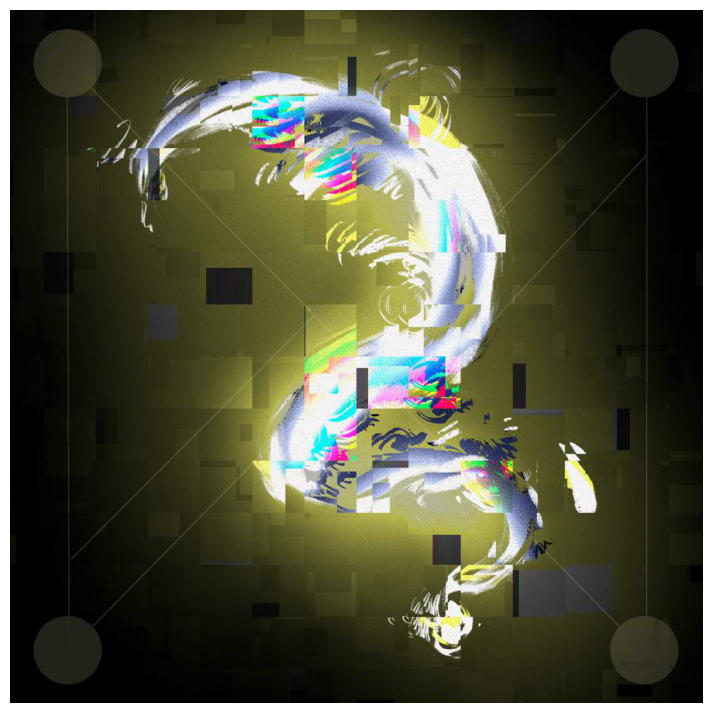

([((0, 0, 0), 237207),
  ((61, 61, 27), 153256),
  ((34, 34, 26), 143058),
  ((90, 88, 39), 66873),
  ((243, 243, 243), 39694),
  ((160, 159, 69), 30026),
  ((117, 116, 51), 29276),
  ((182, 182, 112), 9086),
  ((150, 161, 206), 8817),
  ((61, 61, 61), 7453),
  ((180, 182, 135), 6722),
  ((181, 181, 181), 6548)],
 810000)

In [9]:

img_url = 'resize_dragon.jpeg'

img = plt.imread(img_url)

plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.axis('off')

plt.show()
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x


In [ ]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(', '').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '') for i in colors_pre_list]

    # convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df = pd.DataFrame(zip(df_color_up, df_percent), columns=['c_code', 'occurence'])
    return df

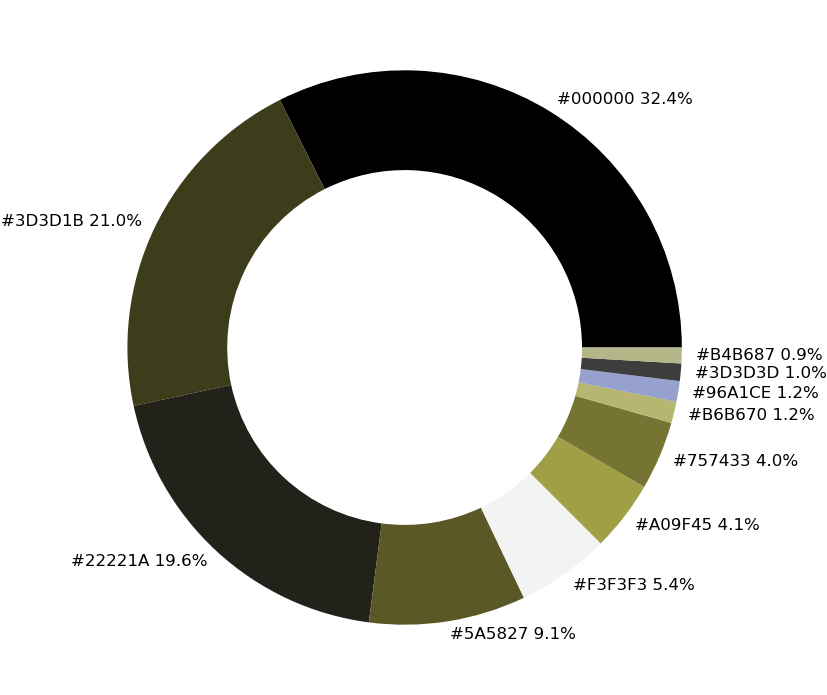

In [10]:
df_color = color_to_df(colors_x)
df_color
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()